# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

This report aims to provide a summary of jobs offered in each location from one of Indonesia's job listing website, Kalibrr. The scrapped data from the website will be transformed to pandas DataFrame format containing the following columns:

* Company name
* Job title
* Job location	
* Number of days since the first time the job was posted	
* Application deadline
* Job posting date
* Remaining days to the application deadline	
* Number of job offered per location

## Step 1: Requesting the Data and Creating a BeautifulSoup

I begin with requesting the web from the site with `get` method.

In [42]:
import requests
from bs4 import BeautifulSoup 
url_get = requests.get('https://www.kalibrr.id/id-ID/job-board/te/data/1')

In [43]:
# range(start, end)
temp = [] #initiating a tuple
for i in range(1, 16):
    url_get = requests.get('https://www.kalibrr.id/id-ID/job-board/te/data/%s' % i)
    url_get.content[1:500]
    soup = BeautifulSoup(url_get.content,"html.parser")
    table = soup.find('div', attrs = {'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})
    company_name = table.find_all('span', attrs = {'class':'k-inline-flex k-items-center k-mb-1'})
    job_title = table.find_all('a', attrs = {'class': 'k-text-primary-color', 'itemprop': 'name'})
    job_location = table.find_all('a', attrs = {'class':"k-text-subdued k-block"})
    postingdate_and_deadline = table.find_all('span', attrs = {'class':'k-block k-mb-1'})
    row_length = len(company_name)

    for i in range(0, row_length):

        #get company_name
        company_name = table.find_all('span', attrs = {'class':'k-inline-flex k-items-center k-mb-1'})[i].text
        company_name = company_name.strip()

        #get job_title
        job_title = table.find_all('a', attrs = {'class': 'k-text-primary-color', 'itemprop': 'name'})[i].text
        job_title = job_title.strip()

        #get job_location
        job_location = table.find_all('a', attrs = {'class':"k-text-subdued k-block"})[i].text
        job_location = job_location.strip()

        #get postingdate_and_deadline 
        postingdate_and_deadline = table.find_all('span', attrs = {'class':'k-block k-mb-1'})[i].text
        postingdate_and_deadline = postingdate_and_deadline.strip()

        temp.append((company_name, job_title, job_location, postingdate_and_deadline))

    temp 

To visualize what I get from the `request.get`, I use .content see what I exactly get, in here I slice it so it won't make our screen full of the html we get from the page. 

I got a very unstructured and complex html, which actually contains the codes needed to show the webpages on my web browser. To tackle this problem and make the format more legible, I must use BeautifulSoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

I then created BeautifulSoup object for that purpose.

## Step 2: Finding the right key to scrap the data & Extracting the right information

Below is the screenshot of the scrapped website, Kalibrr. The images below display:
* The first page, which is the one we scrap
* The inspected elements of the page

**Note: I only scrapped the first page as per url in the capstone instruction: https://www.kalibrr.id/id-ID/job-board/te/data/1**

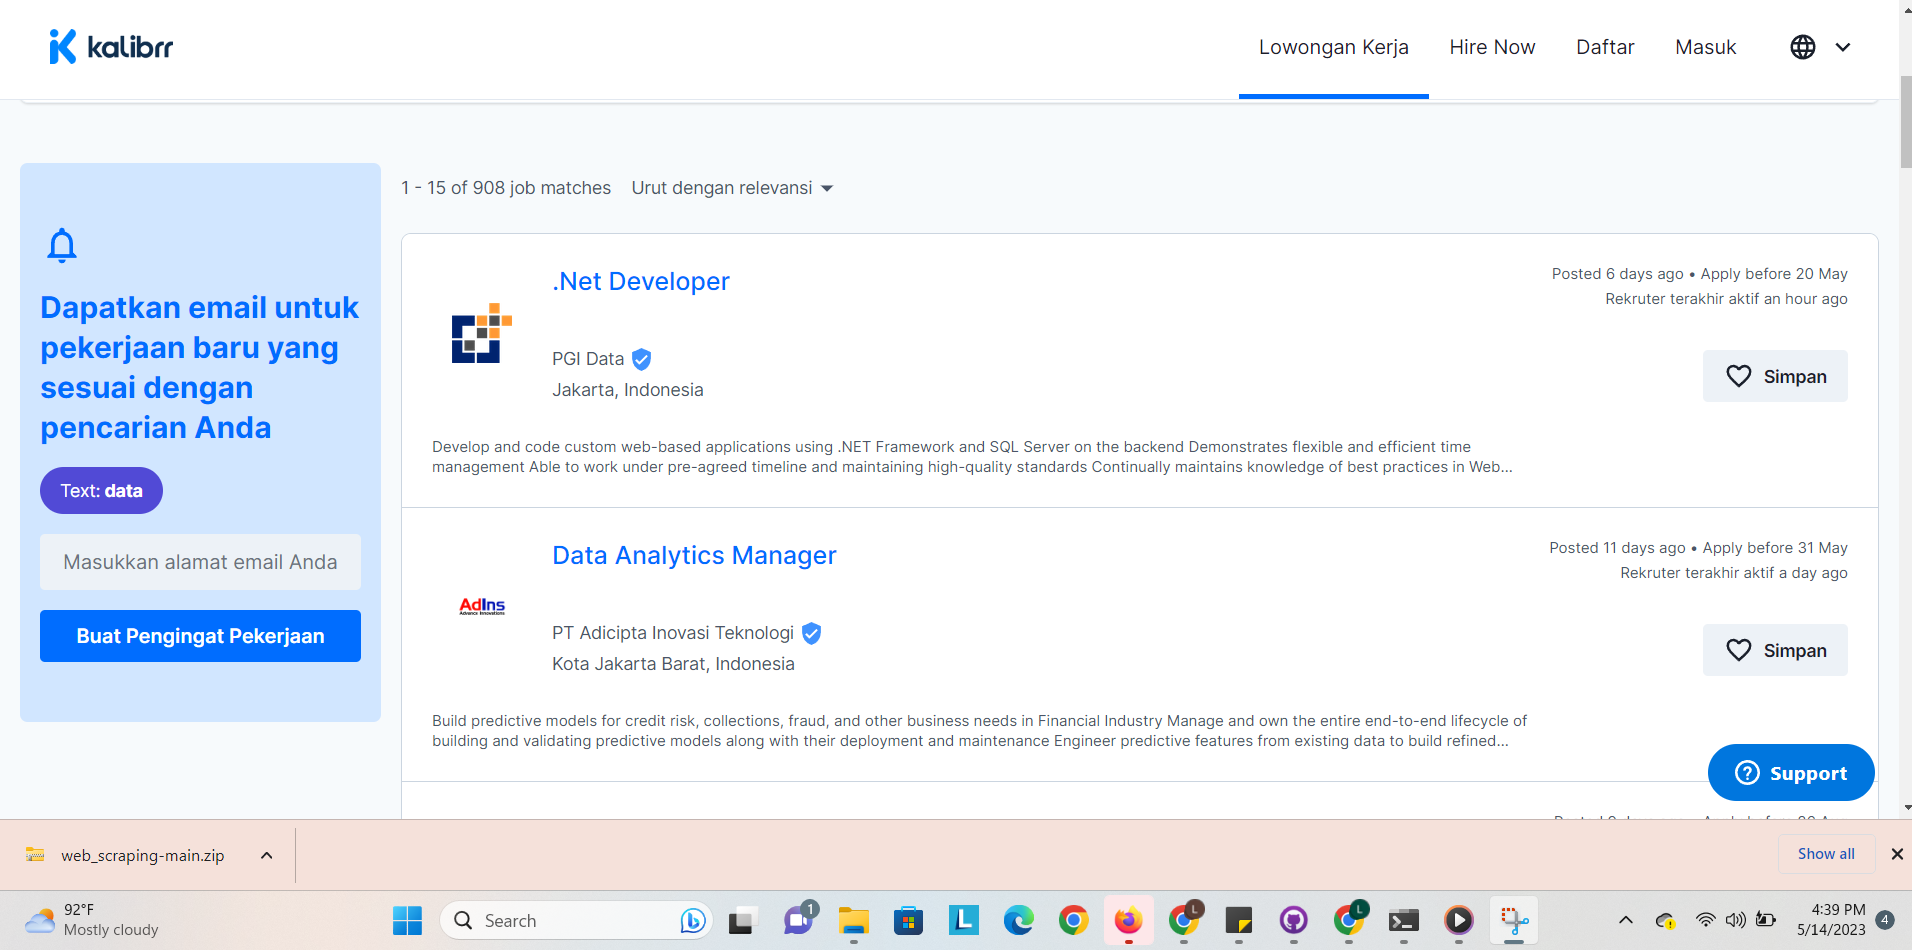

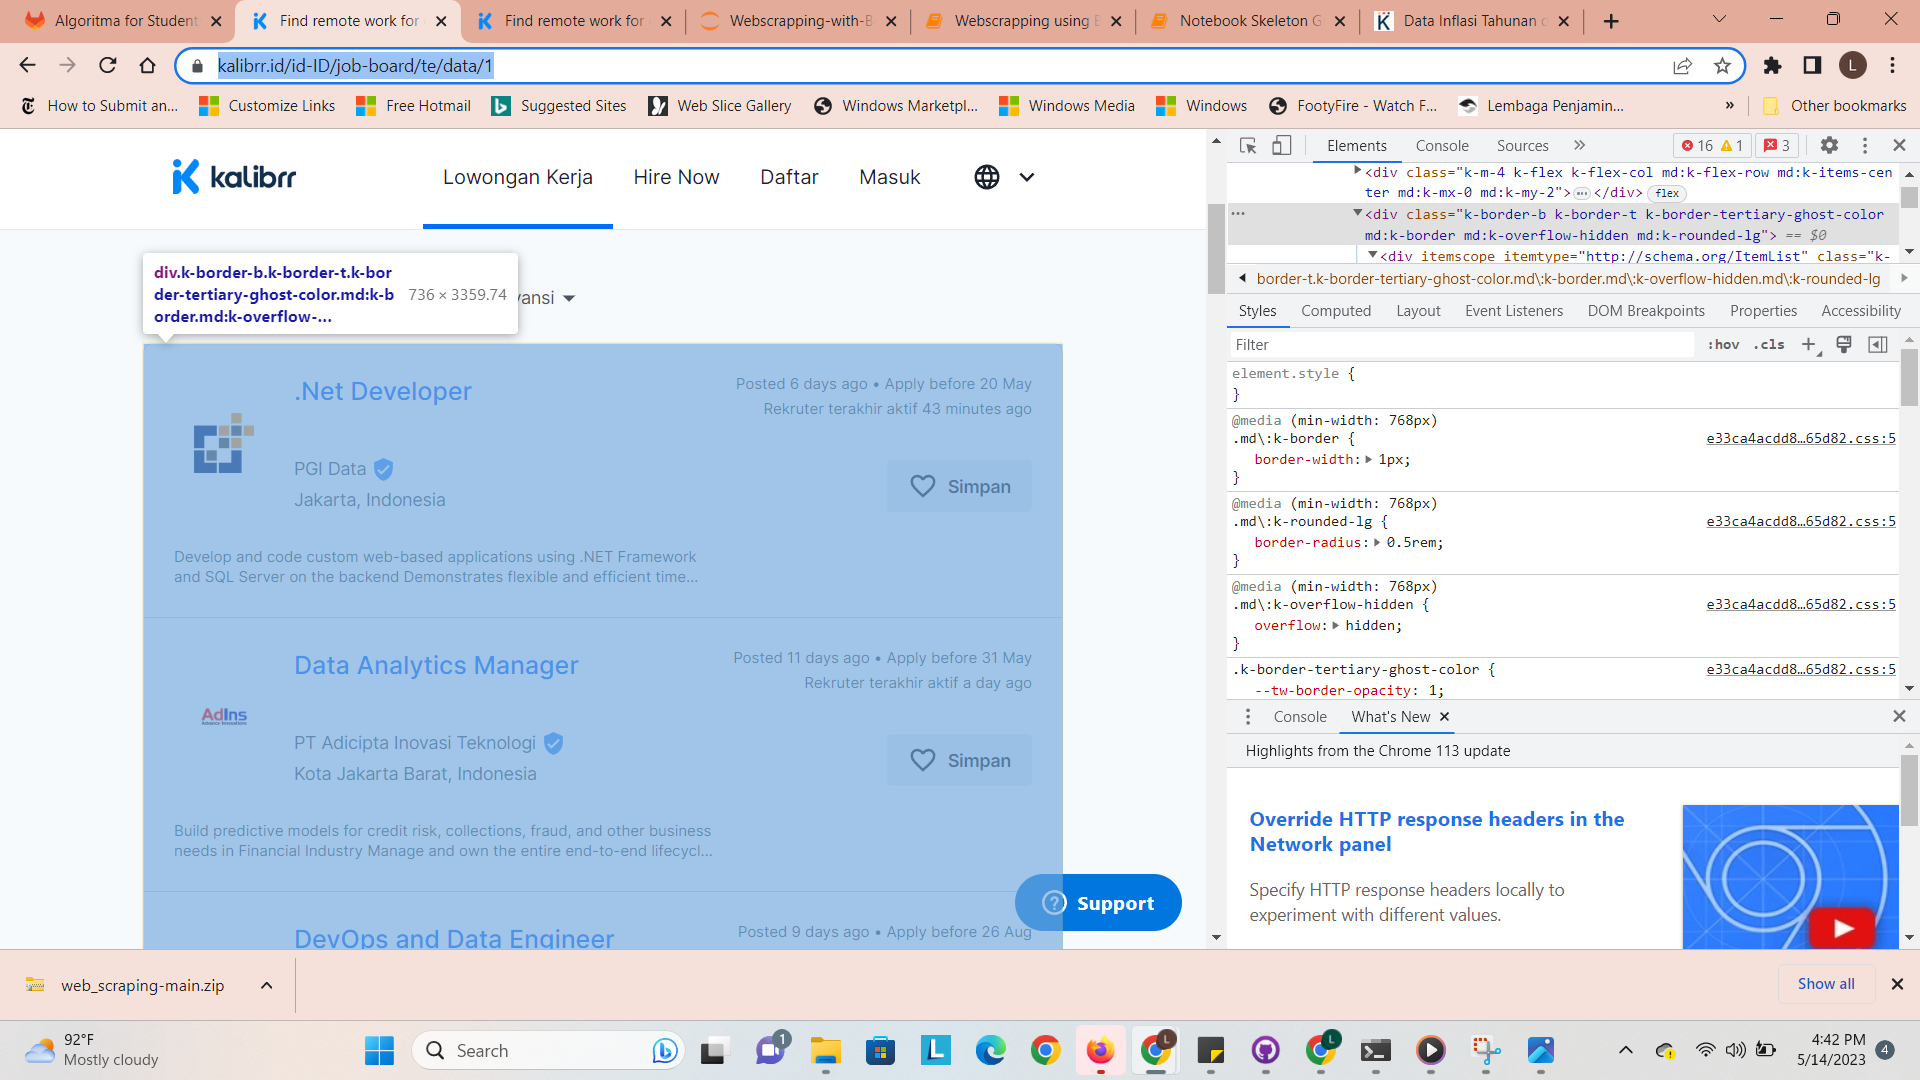

The next step is to find the key and put the key into the `.find()`. I put all the exploring the right key at this cell. After hovering around the page, I found that `k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg` is the right key covering all of the required contents I wanted to scrap.

Next, I used `find_all` method to scrap each of the required data:
* Company Name
* Job Title
* Job Location
* Job Posting Date and Deadline

I also used `row_length` method to find out the number of rows from each of the data and `text` attribute to look at the sample content of each data.

After I finished with `BeautifulSoup` I then started using `loop function` to put the scrapped data into arrays before being organized into one DataFrame.

## Step 3: Creating data frame & Data wrangling

Next step was to put the arrays into DataFrame by using `pandas` library. 

In [44]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('company_name', 'job_title', 'job_location', 'postingdate_and_deadline'))
df

,company_name,job_title,job_location,postingdate_and_deadline
0,PGI Data,Front End Developer (VueJS / Nux JS),"Jakarta, Indonesia",Posted 10 hours ago • Apply before 29 May
1,Mobius Digital,DevOps and Data Engineer,"Tangerang Selatan, Indonesia",Posted 11 days ago • Apply before 25 Aug
2,PT Adicipta Inovasi Teknologi,Data Analytics Manager,"Kota Jakarta Barat, Indonesia",Posted 13 days ago • Apply before 30 May
3,PGI Data,Odoo Developer,"Jakarta, Indonesia",Posted 12 days ago • Apply before 29 Jun
4,Astra Financial,Data Quality Analyst,"Central Jakarta City, Indonesia",Posted 14 days ago • Apply before 1 Jul
...,...,...,...,...
220,PT Adi Data Informatika,IT Developer,"Jakarta Barat, Indonesia",Posted 4 months ago • Apply before 12 Dec
221,PT Adi Data Informatika,IOS & Android Developer,"Jakarta Barat, Indonesia",Posted a month ago • Apply before 10 Jun
222,Kitabisa,Business Intelligence Analyst,"South Jakarta, Indonesia",Posted 3 months ago • Apply before 6 Dec
223,Marga Nusantara Jaya,SALES ADMINISTRATION OFFICER,"Jakarta Timur, Indonesia",Posted 6 months ago • Apply before 30 May


The data cleaning involved a number of method and attributes. My goal was to make the DataFrame display more legible by transforming `postingdate_and_deadline` column into more readable format and to standardize the `job_location` naming as per below.

In [45]:
df['job_location'] = df['job_location'].str.replace(', Indonesia', '')
df['job_location'] = df['job_location'].str.replace('Jakarta Selatan', 'South Jakarta')
df['job_location'] = df['job_location'].str.replace('Kota Jakarta Barat', 'West Jakarta')
df['job_location'] = df['job_location'].str.replace('Jakarta Pusat', 'Central Jakarta')
df['job_location'] = df['job_location'].str.replace('Central Jakarta City', 'Central Jakarta')
df['job_location'] = df['job_location'].str.replace('Tangerang Selatan', 'South Tangerang')
df['postingdate_and_deadline'] = df['postingdate_and_deadline'].str.replace('a month','30 days')
df['postingdate_and_deadline'] = df['postingdate_and_deadline'].str.replace('a day','1 day')
df['posted_since_days_ago'] = df['postingdate_and_deadline'].str.extract('(\d+)')
df['application_deadline'] = df['postingdate_and_deadline'].str.slice(start = -6)
df['application_deadline'] = df['application_deadline'] + ' 2023'
df= df.drop(['postingdate_and_deadline'], axis=1)
df

,company_name,job_title,job_location,posted_since_days_ago,application_deadline
0,PGI Data,Front End Developer (VueJS / Nux JS),Jakarta,10,29 May 2023
1,Mobius Digital,DevOps and Data Engineer,South Tangerang,11,25 Aug 2023
2,PT Adicipta Inovasi Teknologi,Data Analytics Manager,West Jakarta,13,30 May 2023
3,PGI Data,Odoo Developer,Jakarta,12,29 Jun 2023
4,Astra Financial,Data Quality Analyst,Central Jakarta,14,1 Jul 2023
...,...,...,...,...,...
220,PT Adi Data Informatika,IT Developer,Jakarta Barat,4,12 Dec 2023
221,PT Adi Data Informatika,IOS & Android Developer,Jakarta Barat,30,10 Jun 2023
222,Kitabisa,Business Intelligence Analyst,South Jakarta,3,6 Dec 2023
223,Marga Nusantara Jaya,SALES ADMINISTRATION OFFICER,Jakarta Timur,6,30 May 2023


Next, I needed to ensure each column has the appropriate data type. 

In [46]:
df.dtypes

company_name             object
job_title                object
job_location             object
posted_since_days_ago    object
application_deadline     object
dtype: object

In [47]:
df['job_location'] = df['job_location'].astype('category')
df.dtypes

company_name               object
job_title                  object
job_location             category
posted_since_days_ago      object
application_deadline       object
dtype: object

I also refined the `application_deadline` column into date format.

In [48]:
df['application_deadline'] = pd.to_datetime(df['application_deadline'], format = '%d %b %Y')

In [49]:
df.dtypes

company_name                     object
job_title                        object
job_location                   category
posted_since_days_ago            object
application_deadline     datetime64[ns]
dtype: object

In [50]:
df

,company_name,job_title,job_location,posted_since_days_ago,application_deadline
0,PGI Data,Front End Developer (VueJS / Nux JS),Jakarta,10,2023-05-29
1,Mobius Digital,DevOps and Data Engineer,South Tangerang,11,2023-08-25
2,PT Adicipta Inovasi Teknologi,Data Analytics Manager,West Jakarta,13,2023-05-30
3,PGI Data,Odoo Developer,Jakarta,12,2023-06-29
4,Astra Financial,Data Quality Analyst,Central Jakarta,14,2023-07-01
...,...,...,...,...,...
220,PT Adi Data Informatika,IT Developer,Jakarta Barat,4,2023-12-12
221,PT Adi Data Informatika,IOS & Android Developer,Jakarta Barat,30,2023-06-10
222,Kitabisa,Business Intelligence Analyst,South Jakarta,3,2023-12-06
223,Marga Nusantara Jaya,SALES ADMINISTRATION OFFICER,Jakarta Timur,6,2023-05-30


Additionally, I thought of adding `remaining_days` column to give the reader information about how many days are left before the application is closed. I accomplished the task using `to_timedelta` method. I also inserted one additional column `number_of_job_offered` for easier execution of `count` function in the `pivot_table` as my purpose was to count how many jobs posted from each location.

In [51]:
df['posted_since_days_ago'] = df['posted_since_days_ago'].astype('int')
df.dtypes

company_name                     object
job_title                        object
job_location                   category
posted_since_days_ago             int32
application_deadline     datetime64[ns]
dtype: object

In [52]:
df['posted_since_days_ago'] = pd.to_timedelta(df['posted_since_days_ago'], unit='D')

In [53]:
df['posting_date'] = pd.to_datetime('today') - df['posted_since_days_ago']
df['posting_date'] = df['posting_date'].dt.date
df['remaining_days'] = pd.to_datetime('today') - df['application_deadline']
df['remaining_days'] = abs(df['remaining_days'].dt.days)
df['posting_date'] = pd.to_datetime(df['posting_date'])
df.dtypes
df

,company_name,job_title,job_location,posted_since_days_ago,application_deadline,posting_date,remaining_days
0,PGI Data,Front End Developer (VueJS / Nux JS),Jakarta,10 days,2023-05-29,2023-05-06,13
1,Mobius Digital,DevOps and Data Engineer,South Tangerang,11 days,2023-08-25,2023-05-05,101
2,PT Adicipta Inovasi Teknologi,Data Analytics Manager,West Jakarta,13 days,2023-05-30,2023-05-03,14
3,PGI Data,Odoo Developer,Jakarta,12 days,2023-06-29,2023-05-04,44
4,Astra Financial,Data Quality Analyst,Central Jakarta,14 days,2023-07-01,2023-05-02,46
...,...,...,...,...,...,...,...
220,PT Adi Data Informatika,IT Developer,Jakarta Barat,4 days,2023-12-12,2023-05-12,210
221,PT Adi Data Informatika,IOS & Android Developer,Jakarta Barat,30 days,2023-06-10,2023-04-16,25
222,Kitabisa,Business Intelligence Analyst,South Jakarta,3 days,2023-12-06,2023-05-13,204
223,Marga Nusantara Jaya,SALES ADMINISTRATION OFFICER,Jakarta Timur,6 days,2023-05-30,2023-05-10,14


The `pivot_table` method was used to summarize the result (how many jobs offers in each location). The data was sort with `sort_values` before being presented in a bar chart.

In [54]:
df_viz = df.pivot_table(index = 'job_location',
                        values = 'company_name',
                        aggfunc = 'count')
df_viz.reset_index()

,job_location,company_name
0,Bandung,2
1,Bandung Kota,1
2,Bekasi,1
3,Central Jakarta,54
4,Denpasar,1
5,East Jakarta,3
6,Jakarta,21
7,Jakarta Barat,6
8,Jakarta Timur,5
9,Jakarta Utara,3


<Axes: xlabel='job_location'>

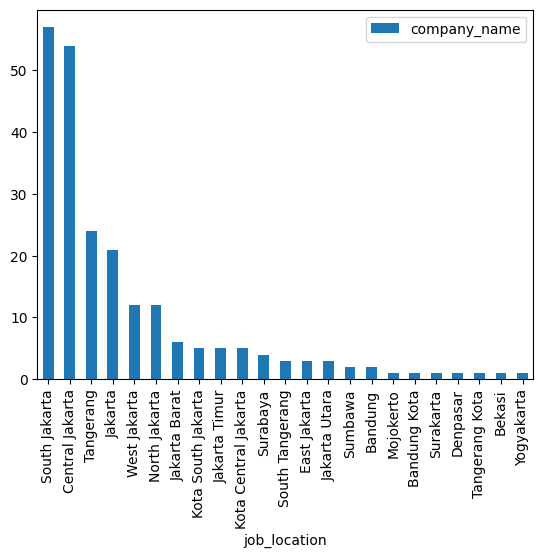

In [57]:
df_viz.sort_values(by='company_name', ascending = False).plot.bar()

### Step 4: Implementing your webscrapping to the flask dashboard

- I copy pasted all of my web scrapping process to the desired position on the `app.py`
- I also changed the title of the dasboard at `index.html`

Below is the screen capture of my `Flask` dashboard.

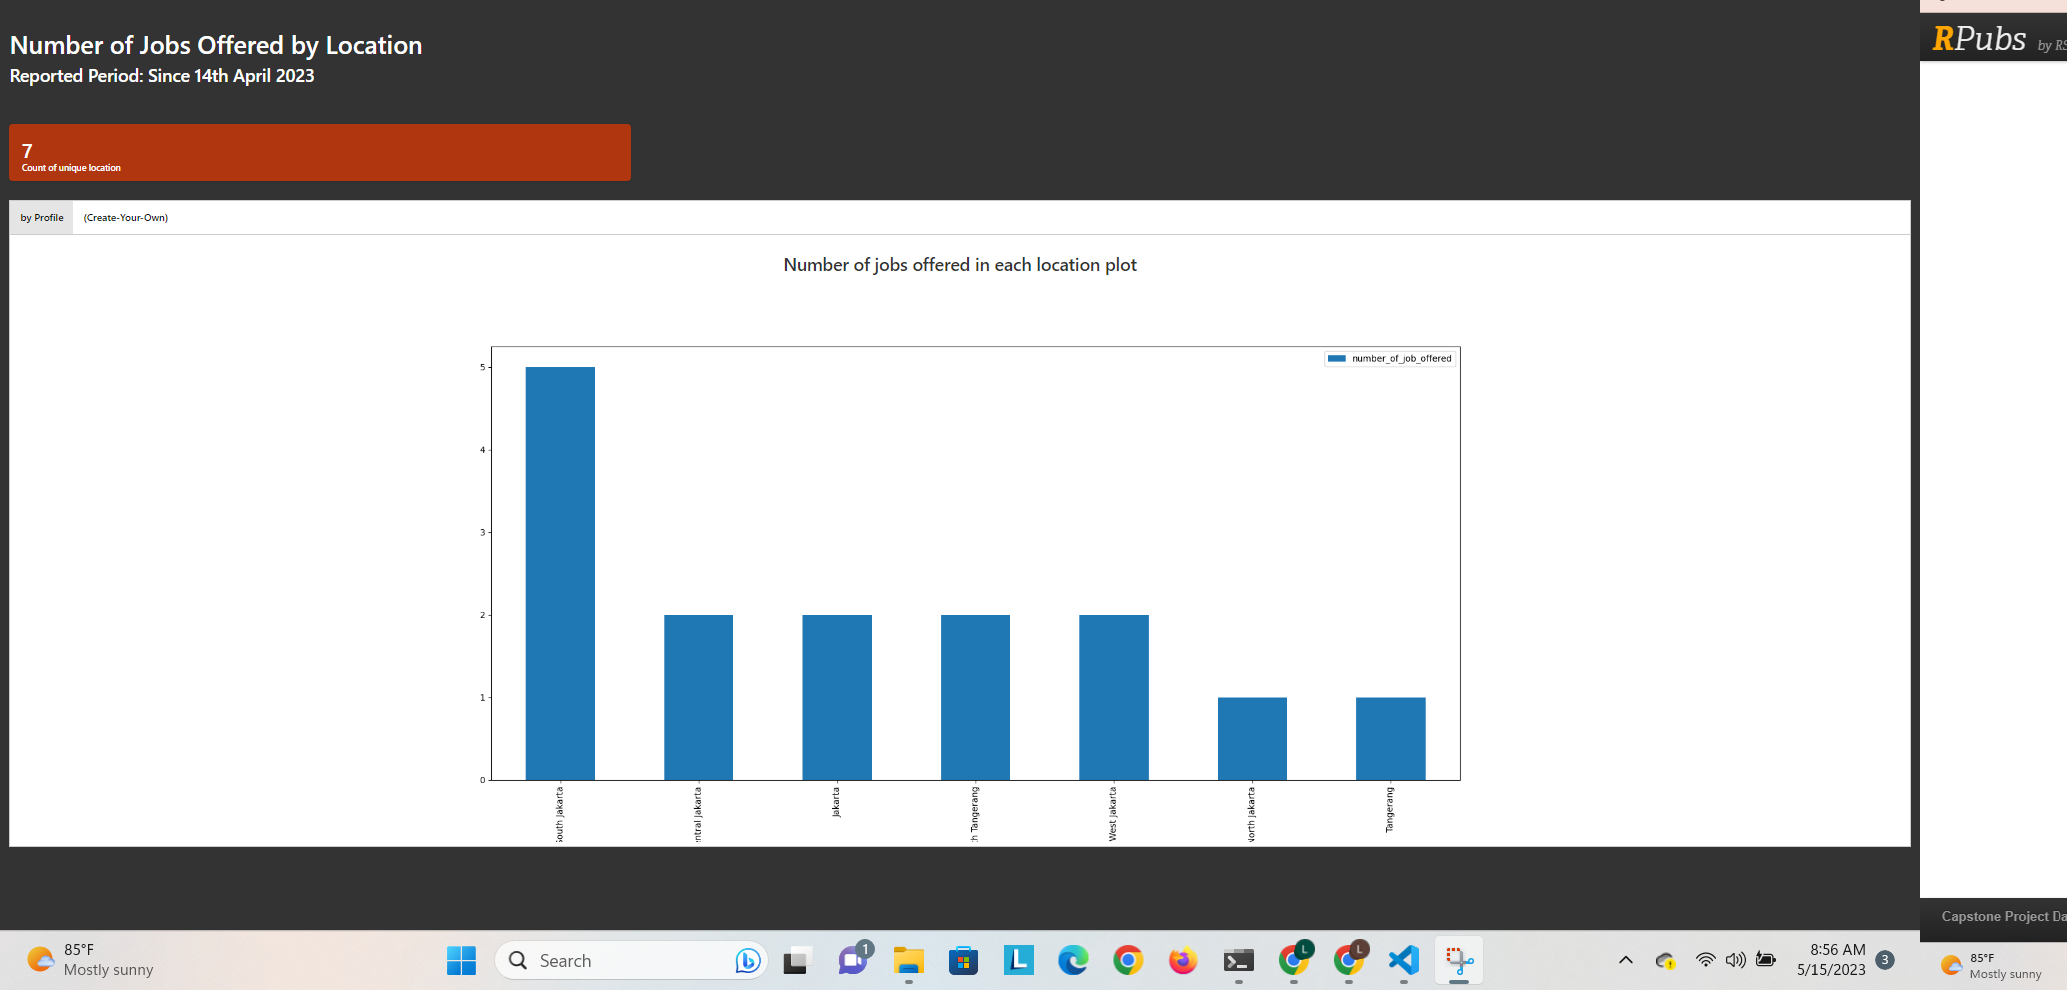

## Step 5: Analysis and Conclusion

From the chart below, there are some conclusions to be drawn. 

<Axes: xlabel='job_location'>

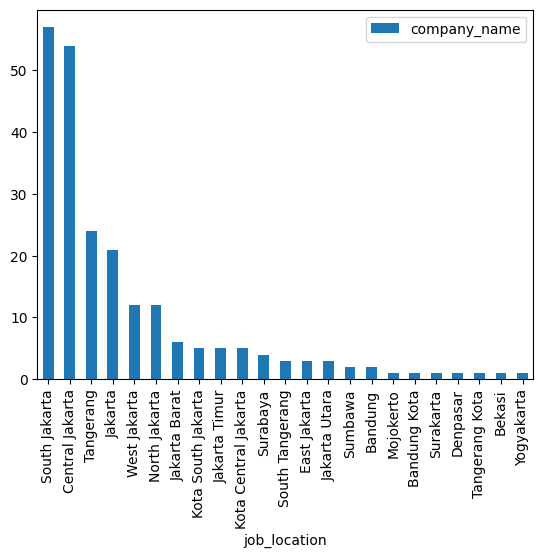

In [58]:
df_viz.sort_values(by='company_name', ascending = False).plot.bar()

**Insights:**
* Jakarta area has more jobs offered compared to Tangerang.
* `South Jakarta` has the highest number of jobs offered.
* Some companies does not specify the city (they only mentions Jakarta or Tangerang). 

**Conclusion:** Jakarta offers more job opportunities than its neighbour city, Tangerang. This also implies the gap in economic opportunities between both cities, which deserves further research.


If I have more time, I would like to conduct additional analysis and implement it in a `webapp`.